In [2]:
print("""
@File         : creating_charts_from_aggregated_data.ipynb
@Author(s)    : Stephen CUI
@LastEditor(s): Stephen CUI
@CreatedTime  : 2025-01-01 16:59:45
@Email        : cuixuanstephen@gmail.com
@Description  : 根据聚合数据创建图表
""")


@File         : creating_charts_from_aggregated_data.ipynb
@Author(s)    : Stephen CUI
@LastEditor(s): Stephen CUI
@CreatedTime  : 2025-01-01 16:59:45
@Email        : cuixuanstephen@gmail.com
@Description  : 根据聚合数据创建图表



In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

plt.ion()

pandas 库可轻松可视化 `pd.Series` 和 `pd.DataFrame` 对象中的数据，分别使用 `pd.Series.plot` 和 `pd.DataFrame.plot` 方法。在本指南中，我们将从相对基本的折线图、条形图、面积图和饼图开始，同时了解 pandas 提供的高级自定义选项。虽然这些图表类型很简单，但有效使用它们对于探索数据、识别趋势和与非技术同事分享研究非常有帮助。

> 需要注意的是，这些图表类型要求你的数据已经聚合。

In [4]:
ser = pd.Series(
    (x ** 2 for x in range(7)),
    name='book_sales', index=(f'Day {x + 1}' for x in range(7)),
    dtype=pd.Int64Dtype()
)

ser

Day 1     0
Day 2     1
Day 3     4
Day 4     9
Day 5    16
Day 6    25
Day 7    36
Name: book_sales, dtype: Int64

调用 `pd.Series.plot` 而不使用任何参数将生成一个折线图，其中 `x` 轴上使用的标签来自行索引，`Y` 轴上的值对应于 `pd.Series` 中的数据：

<Axes: >

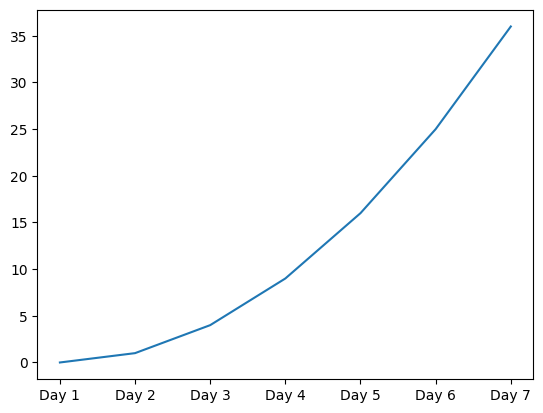

In [5]:
ser.plot()

折线图将我们的数据视为完全连续的数据，从而产生一种可视化效果，该可视化效果似乎显示了每天之间的值，即使我们的数据中不存在该值。

<Axes: >

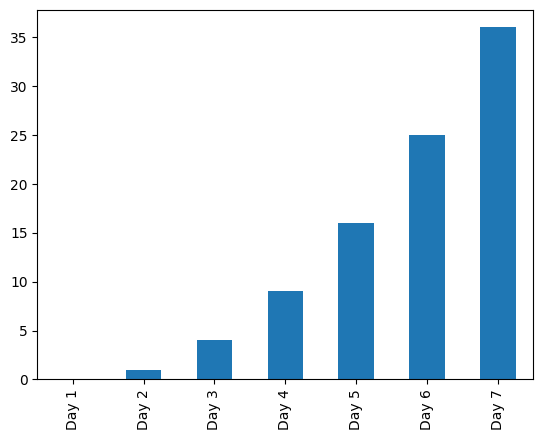

In [6]:
ser.plot(kind='bar')

再次，行索引标签出现在 X 轴上，值出现在 Y 轴上。这可以帮助您从左到右阅读可视化，但在某些情况下，可能会发现从上到下阅读值更容易。在 Pandas 中，这样的可视化将被视为水平条形图，可以使用 `kind="barh"` 参数呈现：

<Axes: >

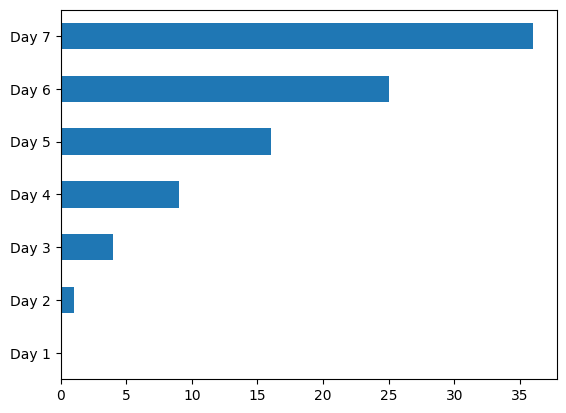

In [7]:
ser.plot(kind='barh')

`kind='area'` 参数将生成面积图，它类似于折线图，但填充了线下方的区域：

<Axes: >

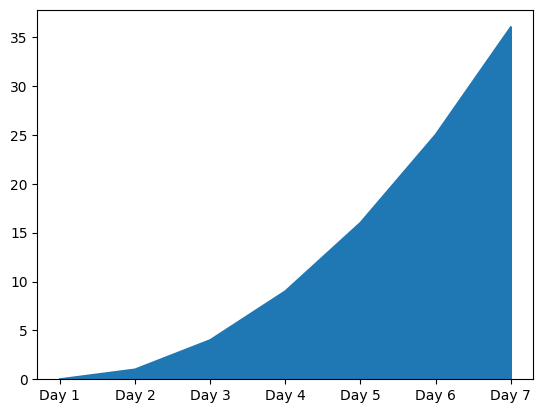

In [8]:
ser.plot(kind='area')

最后但并非最不重要的一点是，我们有饼图。与迄今为止介绍的所有可视化不同，饼图没有 x 轴和 y 轴。相反，行索引中的每个标签代表饼的不同部分，其大小由我们的 `pd.Series` 中的关联值决定：

<Axes: ylabel='book_sales'>

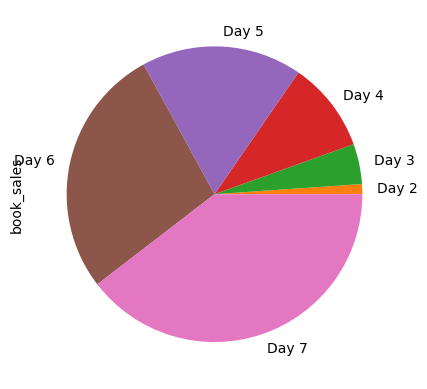

In [9]:
ser.plot(kind='pie')

使用 `pd.DataFrame` 时，生成图表的 API 保持一致，尽管可能会发现需要提供更多关键字参数才能获得所需的可视化效果。

In [10]:
df = pd.DataFrame({
    'book_sales': (x ** 2 for x in range(7)),
    'book_returns': [3, 2, 1, 0, 1, 2, 3],
}, index=(f'Day {x + 1}' for x in range(7)))
df = df.convert_dtypes(dtype_backend='numpy_nullable')
df

,book_sales,book_returns
Day 1,0,3
Day 2,1,2
Day 3,4,1
Day 4,9,0
Day 5,16,1
Day 6,25,2
Day 7,36,3


对 pd.DataFrame.plot 的默认调用将为我们提供一个线图，其中每一 column 都由自己的线表示：

<Axes: >

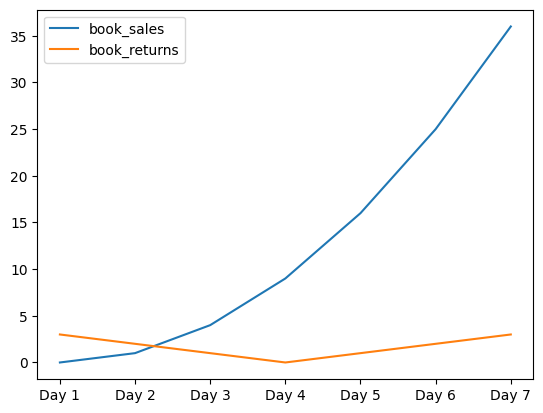

In [11]:
df.plot()

<Axes: >

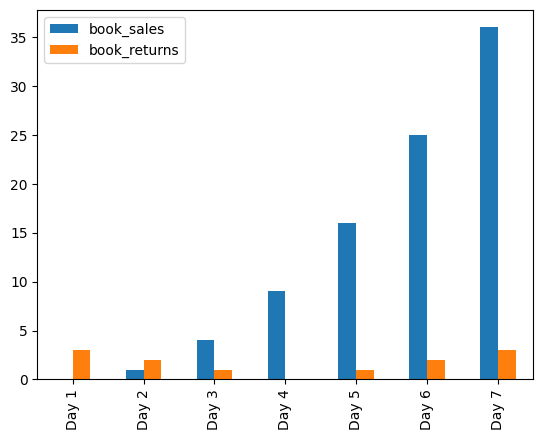

In [12]:
df.plot(kind='bar')

默认情况下，pandas 会将每列显示为图表上的单独条形图。如果希望将列堆叠在一起，请传递 `stacked=True`：

<Axes: >

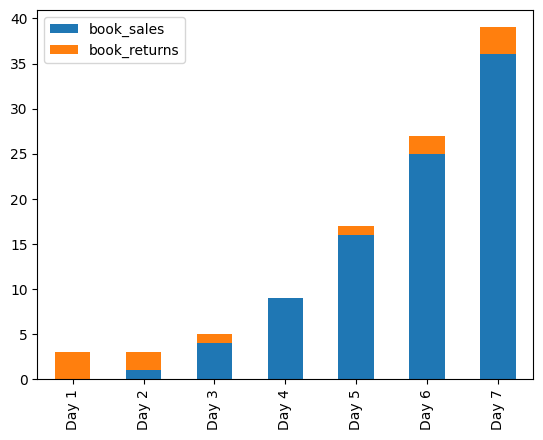

In [13]:
df.plot(kind='bar', stacked=True)

水平条形图也会出现同样的行为。默认情况下，列不会堆叠：

<Axes: >

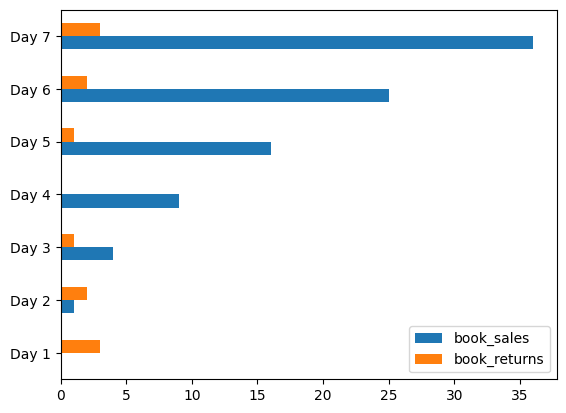

In [14]:
df.plot(kind='barh')

<Axes: >

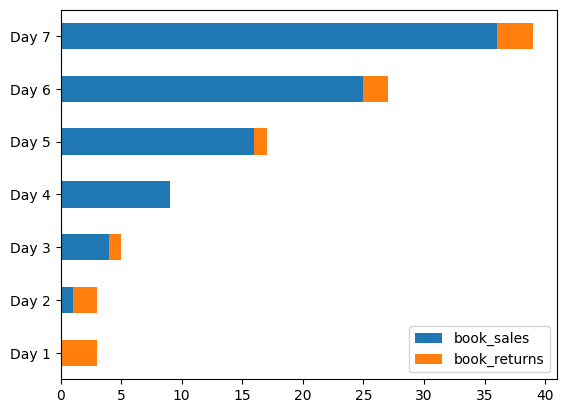

In [15]:
df.plot(kind='barh', stacked=True)

当使用带有面积图的 `pd.DataFrame` 时，默认行为是堆叠列：

<Axes: >

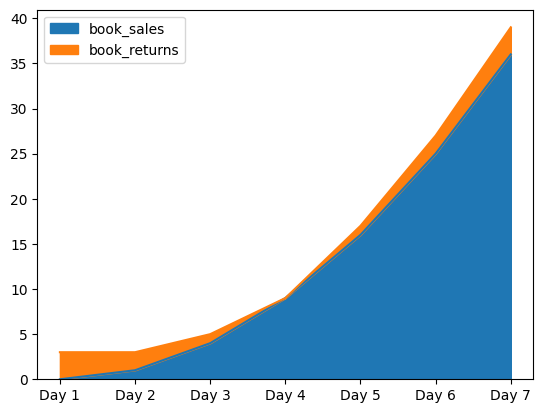

In [16]:
df.plot(kind='area')

要取消堆叠，请传递 `stacked=False` 并包含 `alpha` 参数以引入透明度。此参数的值应介于 0 和 1 之间，值越接近 0，图表就越透明：

<Axes: >

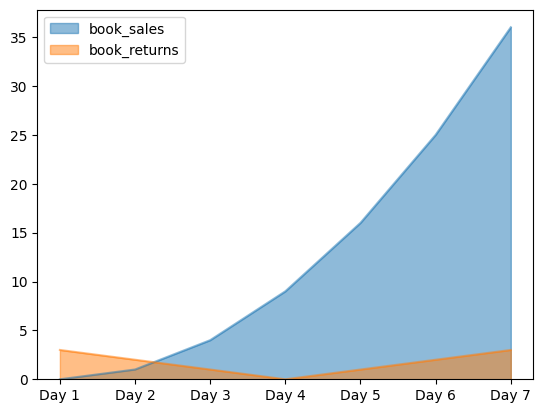

In [17]:
df.plot(kind='area', stacked=False, alpha=.5)

本指南中的示例使用最少量的参数来生成视觉效果。但是，绘图方法接受更多参数来控制标题、标签、颜色等内容。

<Axes: title={'center': 'Book Sales by Day'}>

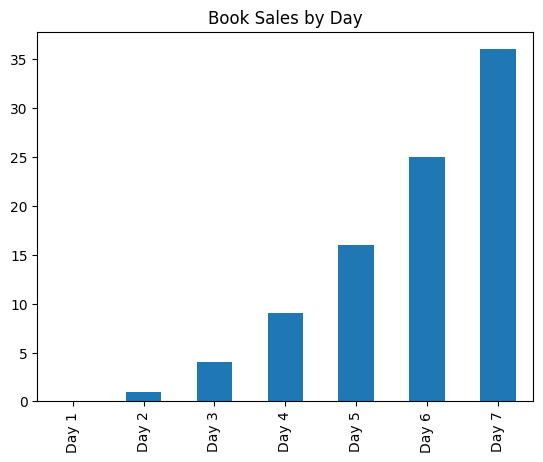

In [18]:
ser.plot(kind='bar', title='Book Sales by Day')

`color` 参数可用于更改图表中线条、条形和标记的颜色。可以使用 RGB 十六进制代码来表示颜色（例如 `#00008B` 表示深蓝色），或者使用 [Matplotlib 命名的颜色](https://matplotlib.org/stable/gallery/color/named_colors.html)：

<Axes: title={'center': 'Book Sales by Day'}>

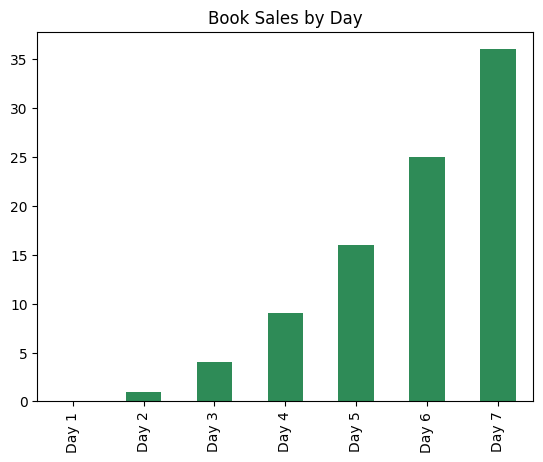

In [19]:
ser.plot(kind='bar', title='Book Sales by Day', color='seagreen')

使用 pd.DataFrame 时，可以将字典传递给 `pd.DataFrame.plot` 来控制哪些列应使用哪些颜色：

<Axes: title={'center': 'Book Sales by Day'}>

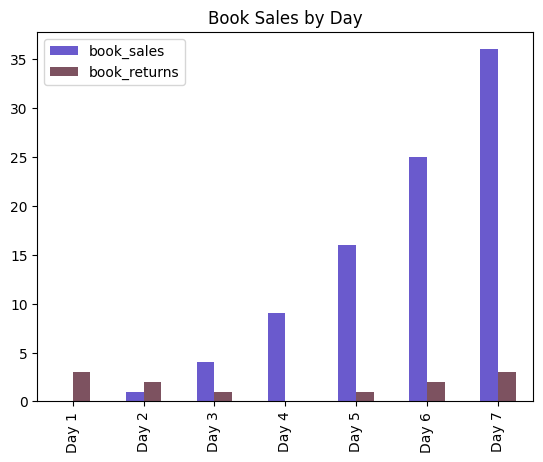

In [21]:
df.plot(
    kind='bar',
    title='Book Sales by Day',
    color={
        'book_sales': 'slateblue',
        'book_returns': '#7D5260'
    }
)

`grid` 参数控制是否显示网格线：

<Axes: title={'center': 'Book Sales by Day'}>

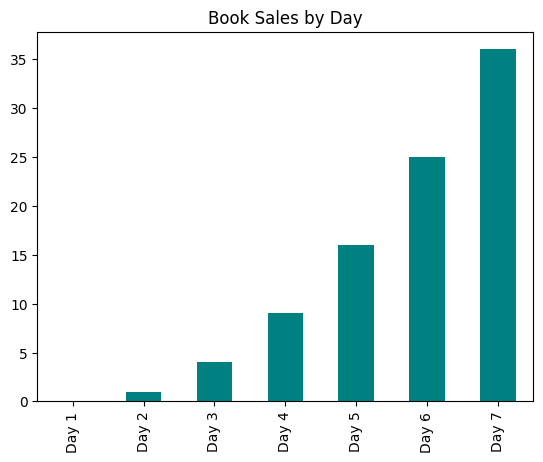

In [23]:
ser.plot(kind='bar', title='Book Sales by Day', grid=False, color='teal')

You can control how your `x` and `y` axes are labeled with the `xlabel` and `ylabel` arguments:

<Axes: title={'center': 'Book Sales by Day'}, xlabel='Day Number', ylabel='Book Sales'>

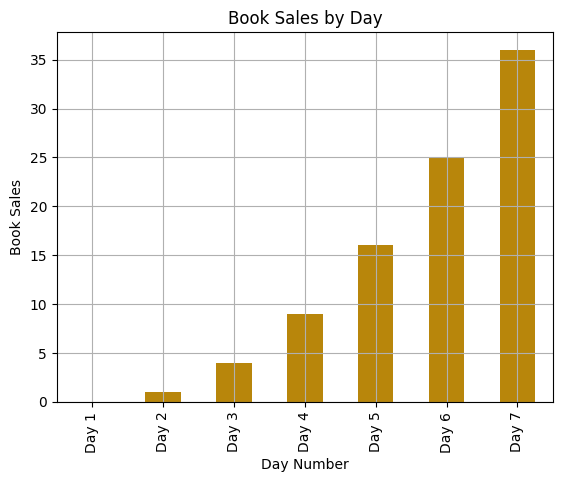

In [25]:
ser.plot(
    kind='bar', title='Book Sales by Day',
    color='darkgoldenrod', grid=True,
    xlabel='Day Number', ylabel='Book Sales'
)

使用 pd.DataFrame 时，pandas 默认将每列的数据放在同一张图表上。但是，可以使用`subplots=True` 轻松生成单独的图表：

array([<Axes: title={'center': 'book_sales'}>,
       <Axes: title={'center': 'book_returns'}>], dtype=object)

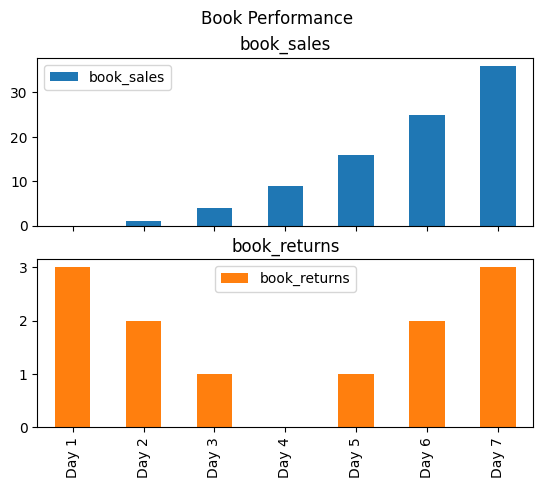

In [26]:
df.plot(
    kind='bar', title='Book Performance',
    grid=False, subplots=True
)

array([<Axes: title={'center': 'book_sales'}>,
       <Axes: title={'center': 'book_returns'}>], dtype=object)

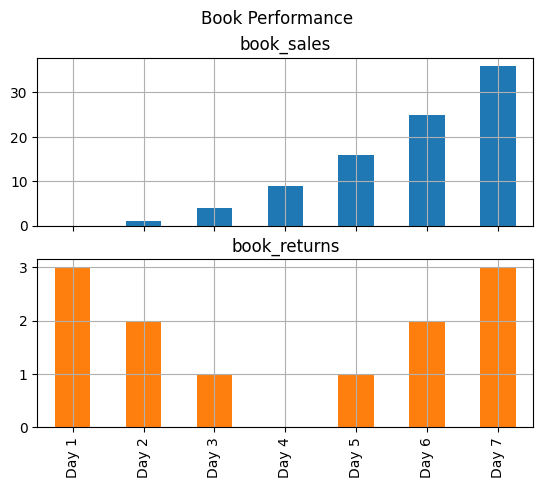

In [27]:
df.plot(
    kind='bar',
    title='Book Performance',
    subplots=True, legend=False, grid=True
)

使用子图时，还值得注意的是，默认情况下，x 轴标签是共享的，但 y 轴值范围可能不同。如果希望共享 y 轴，只需在方法调用中添加 `sharey=True` 即可：

array([<Axes: title={'center': 'book_sales'}>,
       <Axes: title={'center': 'book_returns'}>], dtype=object)

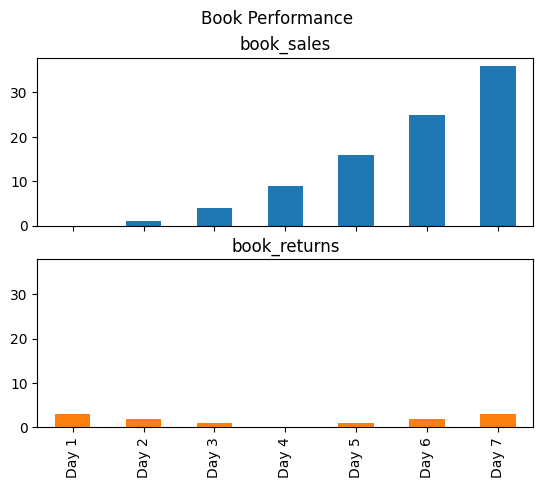

In [29]:
df.plot(kind='bar', 
        title='Book Performance', 
        grid=False, subplots=True, legend=False, sharey=True)

使用 `pd.DataFrame.plot` 时，`y` 参数可以控制哪些列应该被可视化，这在不希望所有列都出现时会很有帮助：

<Axes: title={'center': 'Book Returns'}>

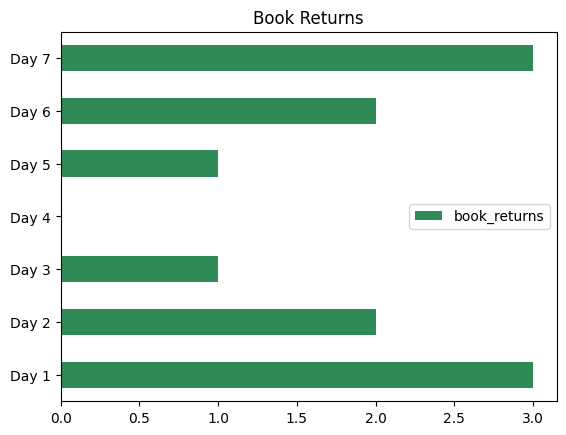

In [32]:
df.plot(
    kind='barh',
    y=['book_returns'],
    title='Book Returns',
    grid=False, color='seagreen'
)